In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Content***

**Columns:**

`age:` age of primary beneficiary

`sex:` insurance contractor gender, female, male

`bmi:` Body mass index, providing an understanding of body, weights that are  relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

`children:` Number of children covered by health insurance / Number of dependents

`smoker:` Smoking

`region:` the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**TARGET FEATURE: y-label >>>**
`charges:` Individual medical costs billed by health insurance

link - https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

### Loading the model

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df = insurance
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🔬 There are no null value.

### One-hot Encoding:- `pd.get_dummies`

In [5]:
insurance_df_one_hot = pd.get_dummies(data = insurance_df)
insurance_df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
insurance_df_one_hot.describe(include = "all")

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
insurance_df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


### Spliting the dataset into X("Independent") and y("Dependent")

In [8]:
X = insurance_df_one_hot.drop(["charges"], axis = 1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [9]:
y = insurance_df_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Spliting the dataset in train & test set

In [10]:
# 20% data
print(1338*.2)
print(1338*.1)

267.6
133.8


In [11]:
# importing the train-test Split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [13]:
X_train.shape

(1070, 11)

In [14]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.losses import *
from keras.metrics import *

In [15]:
# Setting the random seed
tf.random.set_seed(69)

# Creating a model
insurance_model = keras.Sequential([
                                    keras.layers.Dense(10),
                                    keras.layers.Dense(1)
])

# Compile a model
insurance_model.compile(loss = "mae",
                        optimizer = "SGD",
                        metrics = ["mae"])

# Fitting the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 9877.7133 - mae: 9877.7133
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7048.3066 - mae: 7048.3066
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7775.3645 - mae: 7775.3645
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7135.3521 - mae: 7135.3521
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7469.6341 - mae: 7469.6341
Epoch 6/100
34/34 [==============================] - 0s 996us/step - loss: 8151.6621 - mae: 8151.6621
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7297.8198 - mae: 7297.8198
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7622.4375 - mae: 7622.4375
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7481.3670 - mae: 7481.3670
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6989.1705 - mae: 6989.17

In [16]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7356.4976 - mae: 7356.4976


[7356.49755859375, 7356.49755859375]

In [18]:
y_train.describe(include = "all")

count     1070.000000
mean     12905.917532
std      11806.293696
min       1121.873900
25%       4748.057175
50%       9121.374500
75%      15478.411313
max      63770.428010
Name: charges, dtype: float64

### Improving and Optimizing the neural network

 #### Addition of extra layer

In [19]:
# Addition of eextra layers:


# Creating a model
insurance_model_2 = keras.Sequential([
                                      keras.layers.Dense(10),
                                      keras.layers.Dense(20, activation = "relu"),
                                      keras.layers.Dense(10, activation = "relu"),
                                      keras.layers.Dense(1)
])


# Compiling a model
insurance_model_2.compile(loss = keras.losses.mse,
                          optimizer = keras.optimizers.SGD(),
                          metrics = ["mae"])


# fitting a model
insurance_model_2.fit(X_train, y_train, epochs = 100, batch_size= 128)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan              
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
9/9 [====================

In [20]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [21]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

This is happening because our dataset is small and model is way complex wrt. the dataset.

### Normalizing the Data

In [22]:
from sklearn.preprocessing import normalize

In [23]:
X_train_norm = normalize(X_train, norm = "l2", axis = 1)
X_train_norm

array([[0.84273559, 0.53695334, 0.02905985, ..., 0.01452992, 0.        ,
        0.        ],
       [0.49064605, 0.87007899, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79106248, 0.61100978, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82874099, 0.55902347, 0.        , ..., 0.        , 0.        ,
        0.01506802],
       [0.74793359, 0.6620993 , 0.03561589, ..., 0.        , 0.01780794,
        0.        ],
       [0.66169221, 0.74865748, 0.        , ..., 0.        , 0.02363186,
        0.        ]])

In [24]:
X_train_norm.shape

(1070, 11)

#### Addition of eextra layers, using the normalized data, adding activation (relu) and Adam optimizer

In [25]:
# Addition of eextra layers & using the normalized data:


# Creating a model
insurance_model_2_norm = keras.Sequential([
                                      keras.layers.Dense(11),
                                      keras.layers.Dense(100, activation = "relu"),
                                      keras.layers.Dense(10, activation = "relu"),
                                      keras.layers.Dense(1)
])


# Compiling a model
insurance_model_2_norm.compile(loss = keras.losses.mae,
                          optimizer = keras.optimizers.Adam(),
                          metrics = ["mae"])


# fitting a model
insurance_model_2_norm.fit(X_train_norm, y_train, epochs = 100, batch_size= 128, verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 13085.1489 - mae: 13085.1489
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 12405.6851 - mae: 12405.6851
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 13199.5354 - mae: 13199.5354
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 12776.4556 - mae: 12776.4556
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 12859.6736 - mae: 12859.6736
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 13222.6522 - mae: 13222.6522
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 12910.9412 - mae: 12910.9412
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 13065.2544 - mae: 13065.2544
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 12743.8786 - mae: 12743.8786
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 12320.8370 - mae: 12320.8370

In [26]:
insurance_model_2_norm.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 265619.0000 - mae: 265619.0000


[265619.0, 265619.0]

#### Lets use AdaBound
https://medium.com/syncedreview/iclr-2019-fast-as-adam-good-as-sgd-new-optimizer-has-both-78e37e8f9a34

A paper recently accepted for ICLR 2019 challenges this with a novel optimizer — `AdaBound` — that authors say can train machine learning models `“as fast as Adam and as good as SGD.”` Basically, AdaBound is an Adam variant that employs dynamic bounds on learning rates to achieve a gradual and smooth transition to SGD.

In [27]:
# Pip install 
!pip install keras-adabound

  Created wheel for keras-adabound: filename=keras_adabound-0.6.0-cp37-none-any.whl size=6610 sha256=c8adf761d86cbc7bac04701855f9067629aedfefb611b3a32477363f8df3f22f
  Stored in directory: /root/.cache/pip/wheels/f1/81/9c/04af926d62bddd280c97af1704a9baaef511664b56865958e8
Successfully built keras-adabound


In [28]:
from keras_adabound import AdaBound

In [29]:
# Using AdaBound


# Creating a model
insurance_model_2_norm_adabound = keras.Sequential([
                                      keras.layers.Dense(11),
                                      keras.layers.Dense(100, activation = "relu"),
                                      keras.layers.Dense(10, activation = "relu"),
                                      keras.layers.Dense(1)
])


# Compiling a model
insurance_model_2_norm_adabound.compile(loss = keras.losses.mae,
                          optimizer = AdaBound(),
                          metrics = ["mae"])


# fitting a model
insurance_model_2_norm_adabound.fit(X_train_norm, y_train, epochs = 100, batch_size= 128, verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 13085.1565 - mae: 13085.1565
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 12405.6497 - mae: 12405.6497
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 13199.4287 - mae: 13199.4287
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 12776.2527 - mae: 12776.2527
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 12859.3037 - mae: 12859.3037
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 13221.9280 - mae: 13221.9280
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 12909.2928 - mae: 12909.2928
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 13060.8479 - mae: 13060.8479
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 12730.1391 - mae: 12730.1391
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 12264.3170 - mae: 12264.3170

In [30]:
insurance_model_2_norm_adabound.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 14716.4561 - mae: 14716.4561


[14716.4560546875, 14716.4560546875]

using adabound should have result better, it is not happening...... :(

### Non-normalize data with Adam

In [31]:
# Using non-normalize data + Adam


# Creating a model
insurance_model_2_adam = keras.Sequential([
                                      keras.layers.Dense(11),
                                      keras.layers.Dense(110, activation = "relu"),
                                      keras.layers.Dense(11, activation = "relu"),
                                      keras.layers.Dense(1)
])


# Compiling a model
insurance_model_2_adam.compile(loss = keras.losses.mae,
                          optimizer = Adam(),
                          metrics = ["mae"])


# fitting a model
insurance_model_2_adam.fit(X_train, y_train, epochs = 100, batch_size= 128, verbose = 1)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 13088.2206 - mae: 13088.2206
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 12404.1627 - mae: 12404.1627
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 13194.4702 - mae: 13194.4702
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 12764.8354 - mae: 12764.8354
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 12839.8043 - mae: 12839.8043
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 13191.8520 - mae: 13191.8520
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 12864.7354 - mae: 12864.7354
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 12997.8070 - mae: 12997.8070
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 12647.5113 - mae: 12647.5113
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 12186.3249 - mae: 12186.3249

In [32]:
insurance_model_2_adam.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8047.0410 - mae: 8047.0410


[8047.041015625, 8047.041015625]

although train loss is low, test loss is high.

### tweaking it further using `insurance_model_3`

In [33]:
# Using non-normalize data + Adam


# Creating a model
insurance_model_3 = keras.Sequential([
                                      keras.layers.Dense(11),
                                      keras.layers.Dense(55, activation = "relu"),
                                      keras.layers.Dense(11, activation = "relu"),
                                      keras.layers.Dense(1)
])


# Compiling a model
insurance_model_3.compile(loss = keras.losses.mae,
                          optimizer = Adam(),
                          metrics = ["mae"])


# fitting a model
history_model_3 = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13171.1229 - mae: 13171.1229
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12285.4021 - mae: 12285.4021
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13051.6125 - mae: 13051.6125
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12446.1138 - mae: 12446.1138
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11896.9197 - mae: 11896.9197
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 11390.4193 - mae: 11390.4193
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 9319.5118 - mae: 9319.5118
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 8050.9591 - mae: 8050.9591
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6985.4198 - mae: 6985.4198
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6582.1734 - ma

In [34]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4019.0815 - mae: 4019.0815


[4019.08154296875, 4019.08154296875]

A significant imporovement.

Text(0.5, 0, 'epochs->')

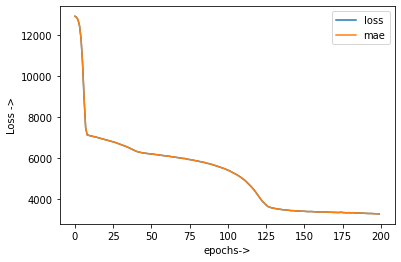

In [35]:
# ploting history or the Loss Curve or the training curve
pd.DataFrame(history_model_3.history).plot()
plt.ylabel("Loss ->")
plt.xlabel("epochs->")

### How long we should train a model:
> Introduction to `tf.keras.callbacks.EarlyStopping`:
Stop training when a monitored metric has stopped improving.  
link: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [36]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


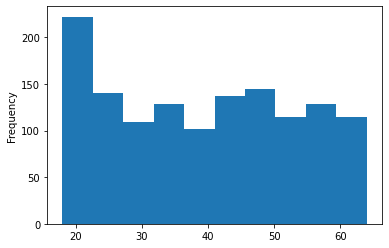

In [37]:
X["age"].plot(kind = "hist")

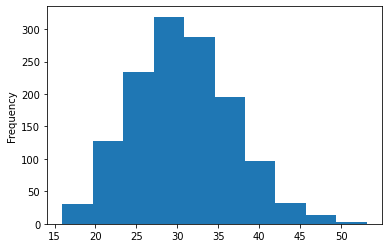

In [38]:
X["bmi"].plot(kind = "hist")

In [39]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

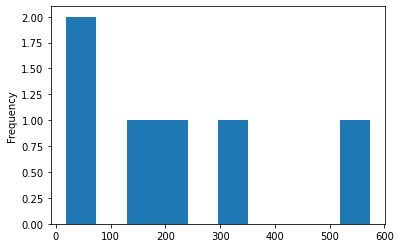

In [40]:
X["children"].value_counts().plot(kind = "hist")

### Data Preprocessing(Normalization and Standardization)

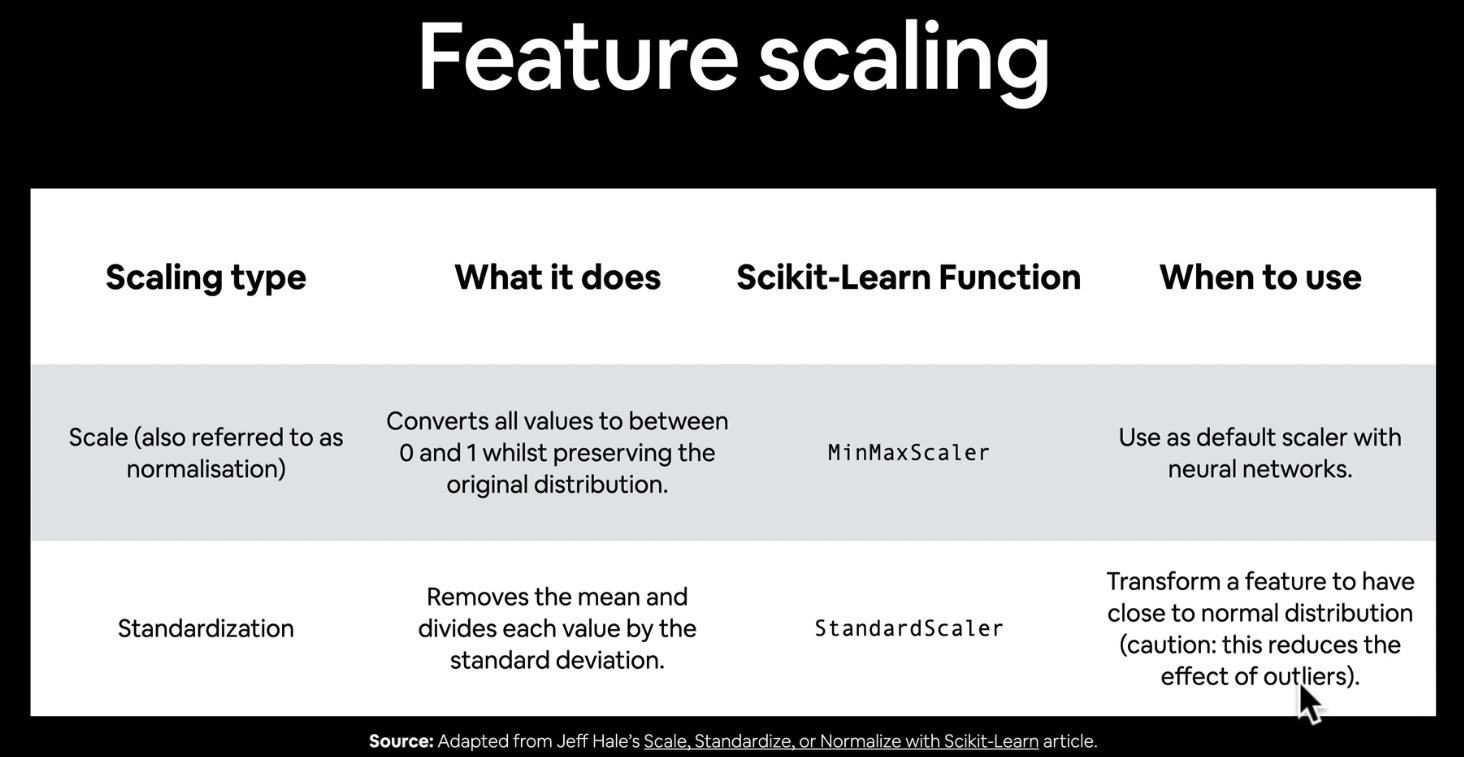

### We will build the complete model but this time with proper Feature Engineering

In [41]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***Normalization is a default choice for Neural network as Normalized Data tesnd to converge faster***

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [43]:
# Creating a column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Transforming the values of these columns between {0&1}
    (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"]) # one hot encoding
)

In [44]:
# Creating X and y
X = insurance_df.drop(["charges"], axis = 1)
y = insurance_df["charges"]

In [45]:
X, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [46]:
# Train-test Split
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [47]:
print(X_train_norm.shape)
print(y_train_norm.shape)
print(X_test_norm.shape)
print(y_test_norm.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


`fit_transform()` vs `transform()`: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [48]:
# fitting the columns transformer to the training data and applying the transformer - Normalization(MinMaxScaller) and OneHotEncoder
X_train_ct = ct.fit_transform(X_train_norm)

# Applying only transformer on testing Data
X_test_ct = ct.transform(X_test_norm)

In [49]:
X_train_ct[0]

array([0.86956522, 0.56483723, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        ])

In [50]:
X_train_norm.iloc[0]

age                58
sex              male
bmi            36.955
children            2
smoker            yes
region      northwest
Name: 55, dtype: object

In [51]:
X_train_norm.shape, X_train_ct.shape

((1070, 6), (1070, 11))

### Send it to neural network model

In [52]:
insurance_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 55)                660       
_________________________________________________________________
dense_20 (Dense)             (None, 11)                616       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 12        
Total params: 1,420
Trainable params: 1,420
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Setting the random seed
tf.random.set_seed(69)


# Create a model
norm_model_1 = keras.Sequential([
                               keras.layers.Dense(11),
                               keras.layers.Dense(55, activation= "relu"),
                               keras.layers.Dense(11, activation= "relu"),
                               keras.layers.Dense(1)
])

# Model Compile
norm_model_1.compile(loss = "mae",
                   optimizer = Adam(),
                   metrics = ["mae"])

# Fitting the model
history_norm_1 = norm_model_1.fit(X_train_ct, y_train_norm, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13166.2108 - mae: 13166.2108
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12319.5819 - mae: 12319.5819
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13176.9922 - mae: 13176.9922
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12793.8953 - mae: 12793.8953
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12717.9695 - mae: 12717.9695
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13130.4233 - mae: 13130.4233
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12405.2535 - mae: 12405.2535
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12268.9133 - mae: 12268.9133
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 11041.2650 - mae: 11041.2650
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 9643.906

Text(0.5, 0, 'Epochs -->')

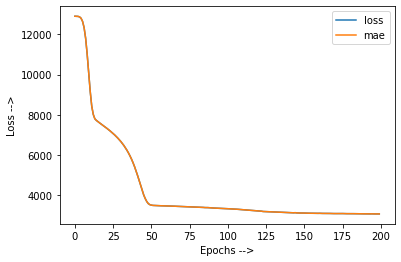

In [54]:
pd.DataFrame(history_norm_1.history).plot()
plt.ylabel("Loss -->")
plt.xlabel("Epochs -->")

In [55]:
norm_model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_23 (Dense)             (None, 55)                660       
_________________________________________________________________
dense_24 (Dense)             (None, 11)                616       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 12        
Total params: 1,420
Trainable params: 1,420
Non-trainable params: 0
_________________________________________________________________
